## 3D-DAOSTORM 2D / 2D fixed analysis.
This notebook explains how to do 2D or 2D fixed analysis using 3D-DAOSTORM.
* In 2D fixed fitting we constrain the Gaussian fitting function with a fixed $\sigma$ value.
* In 2D fitting the Gaussian $\sigma$ can vary, but it is forced to be the same in X and Y.

### Configuring the directory
Create an empty directory somewhere on your computer and tell Python to go to that directory.

In [2]:
import os
os.chdir("D:\\processed\\maximumIntensityProjections\\180712 Merfish\\zscan_00")
print(os.getcwd())

inputfile = "bit16.tif"
hdffile = inputfile.split(".")[0] + ".hdf5"
binfile = inputfile.split(".")[0] + ".mlist.bin"

import storm_analysis.sa_library.parameters as params
daop = params.ParametersDAO().initFromFile("example.xml")
daop.changeAttr("max_frame", 1)
print("max_frame is", daop.getAttr("max_frame"))

daop.changeAttr("threshold", 15)
daop.changeAttr("background_sigma", 4) # original value is 8.0
daop.changeAttr("foreground_sigma", 1) # original value is 1.0
daop.changeAttr("find_max_radius", 5) # original value is 5 (pixels)
daop.changeAttr("roi_size", 9) # original value is 9 (pixels)
daop.changeAttr("sigma", 1.5) # original value is 1.5 (pixels)
daop.changeAttr("pixel_size", 100.0) # original value is 100.0 (pixels)
daop.changeAttr("model", "2dfixed") # original value is 2d

# daop.prettyPrint()

import os
import storm_analysis.jupyter_examples.overlay_image as overlay_image
import storm_analysis.daostorm_3d.mufit_analysis as mfit

# Save the changed parameters.
daop.toXMLFile("testing.xml")

if os.path.exists(hdffile):
    os.remove(hdffile)
mfit.analyze(inputfile, hdffile, "testing.xml")
overlay_image.overlayImage(inputfile, hdffile, 0)

import storm_analysis.sa_utilities.hdf5_to_bin as hdf5bin
hdf5bin.hdf5ToBin(hdffile, binfile)



D:\processed\maximumIntensityProjections\180712 Merfish\zscan_00


FileNotFoundError: [Errno 2] No such file or directory: 'example.xml'

Generate sample data for analysis.

In [2]:
import inspect
import storm_analysis

vis_path = os.path.dirname(inspect.getfile(storm_analysis)) + "/visualizer/"

vis_cmd = vis_path + "/visualizer.py"
vis_dir = os.getcwd()

%run $vis_cmd $vis_dir

print(vis_path)



/Users/mathewedwards/anaconda/lib/python3.6/site-packages/storm_analysis-2.0-py3.6.egg/storm_analysis/visualizer/


### Working with analysis parameters.
In this example we'll only adjust `threshold` but other important parameters include `sigma`, `roi_size` and `find_max_radius`.

In [80]:
import storm_analysis.sa_library.parameters as params
daop = params.ParametersDAO().initFromFile("example.xml")

Getting help with a parameter:

Changing or getting a parameter. Here we are setting `max_frame` to 1 so that 3D-DAOSTORM will only analyze the first frame.

In [17]:
daop.changeAttr("max_frame", 1)
print("max_frame is", daop.getAttr("max_frame"))

max_frame is 1


In [30]:
daop.changeAttr("threshold", 10)
daop.changeAttr("background_sigma", 8) # original value is 8.0
daop.changeAttr("foreground_sigma", 1) # original value is 1.0
daop.changeAttr("find_max_radius", 15) # original value is 5 (pixels)
daop.changeAttr("roi_size", 9) # original value is 9 (pixels)
daop.changeAttr("sigma", 1.5) # original value is 1.5 (pixels)
daop.changeAttr("pixel_size", 100.0) # original value is 100.0 (pixels)
daop.changeAttr("model", "2dfixed") # original value is 2d

Print out all of the available parameters and their current values.

In [31]:
daop.prettyPrint()

background_sigma (float) - 8
camera_gain (float) - 1.0
camera_offset (float) - 100.0
convert_to (string) - None
cutoff (float) - 0.0
d_scale (int) - 2
descriptor (string) - 1
do_zfit (int) - 0
drift_correction (int) - 1
find_max_radius (int) - 15
foreground_sigma (float) - 1
frame_step (int) - 500
iterations (int) - 20
max_frame (int) - 1
max_gap (int) - None
max_z (float) - 0.5
min_z (float) - -0.5
model (string) - 2dfixed
no_fitting (int) - None
parameters_file (parameters_filename) - example.xml
peak_locations (filename) - None
pixel_size (float) - 100.0
radius (float) - 0.5
roi_size (int) - 9
sigma (float) - 1.5
start_frame (int) - -1
static_background_estimate (int) - None
threshold (float) - 10
wxA (float) - 0.0
wxB (float) - 0.0
wxC (float) - 0.0
wxD (float) - 0.0
wx_c (float) - 150.0
wx_d (float) - 400.0
wx_wo (float) - 300.0
wyA (float) - 0.0
wyB (float) - 0.0
wyC (float) - 0.0
wyD (float) - 0.0
wy_c (float) - -150.0
wy_d (float) - 400.0
wy_wo (float) - 300.0
x_start (int) - N

### Testing analysis parameters.

In [32]:
import os
import storm_analysis.jupyter_examples.overlay_image as overlay_image
import storm_analysis.daostorm_3d.mufit_analysis as mfit


In [33]:
# Save the changed parameters.
daop.toXMLFile("testing.xml")

Test 3D-DAOSTORM analysis with these parameters. Ideally it should find 120 localizations in the frame.

Note that 3D-DAOSTORM will first check for existing analysis so you have to delete the old analysis after changing parameters.

In [34]:
if os.path.exists("bit14_sub.hdf5"):
    os.remove("bit14_sub.hdf5")
    
mfit.analyze("bit14_sub.tif", "bit14_sub.hdf5", "testing.xml")


Peak finding
Frame: 0 374 374

Added 374
   19 peak finding iterations.

   0 fits reset due to Cholesky failure.
   0 fits reset due to image margin.
   0 fits reset due to negative value in fit function.
   0 fits reset due to negative height.
   0 fits reset due to negative width.
   3164 fits reset due to non-decreasing error (LM).
   0 fits did not converge.
   0 fits were lost.
   0 peaks lost to proximity filter.
   19 peaks lost to low significance.
   0 peaks lost to width filter.
   24583 fitting iterations.

Drift Correction.

Tracking.
 processing frame 0, 0 tracks
Added 374 tracks

Checking z values.
 track group 0

Analysis complete


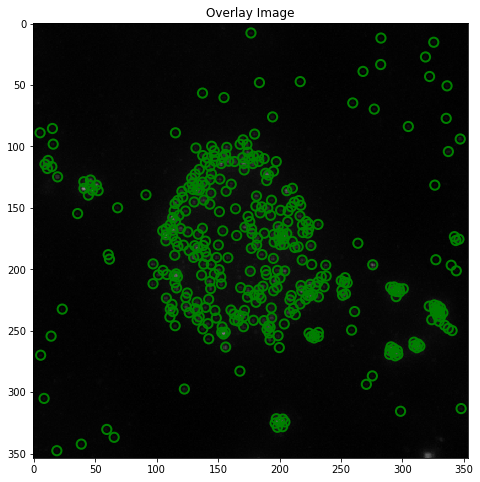

In [35]:
overlay_image.overlayImage("bit14_sub.tif", "bit14_sub.hdf5", 0)

### Using Visualizer

An alternative way to visualize the results is to use the visualizer program. This will only work if you are running jupyter locally.

In [ ]:
import inspect
import storm_analysis

vis_path = os.path.dirname(inspect.getfile(storm_analysis)) + "/visualizer/"

vis_cmd = vis_path + "/visualizer.py"
vis_dir = os.getcwd()

%run $vis_cmd $vis_dir

print(vis_path)

### Analyzing the whole movie

### Creating an image from the analysis

In [12]:
import storm_analysis.sa_utilities.hdf5_to_bin as hdf5bin
hdf5bin.hdf5ToBin("FOV63_F.hdf5", "FOV63_F.mlist.bin")

Converting tracks.
Added 2824
